In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

In [41]:
sglisting = pd.read_csv('./SG listings (1).csv')

In [42]:
sglisting_summary = pd.read_csv('./SG listings.csv')

In [43]:
sgcalendar = pd.read_csv('./SG calendar.csv')

In [44]:
sgreviews = pd.read_csv('./SG reviews.csv')

In [45]:
# Check listings to remove based on the listing name

drop_list = []

for i,listing_name in enumerate(sglisting['name']):
    try: 
        if 'test' in listing_name.lower():
            print(i, listing_name)
            drop_list.append(i)
    except AttributeError:
        print (i, listing_name)
        drop_list.append(i)

print('  ')
print('The list of indices to drop:')
print(drop_list)

1135 nan
1479 nan
4054 [Test] Cozy Modern House with Unique Architecture
4790 test test
7082 Testing
  
The list of indices to drop:
[1135, 1479, 4054, 4790, 7082]


In [46]:
# Drop all the test listings since we only want to study listings that are actually in use or were meant to be used

sglisting = sglisting.drop(drop_list,axis=0)

In [47]:
# Create a column to mark if listings were operational in the last 12 months
## 0 = Not operational, 1 = Operational

    # Create a function to convert values in the column

def operational_label(x):
    x = x.replace('never','0')
    x = x.replace('today','1')
    x = x.replace('yesterday','1')
    x = x.replace('a week ago','1')
    x = [int(i) for i in x.split() if i.isdigit()]
    
    return x

In [48]:
# Create a column to mark if listings were operational in the last 12 months

    # Create a function to convert values in the column

sglisting['Operational'] = sglisting['calendar_updated'].map(lambda x: operational_label(x))

operational_list = []

for list in sglisting['Operational']:
    for value in list:
        if value > 13:
            operational_list.append(0)
        else:
            operational_list.append(1)
            
sglisting['Operational'] = operational_list

In [49]:
operational = sglisting[sglisting['Operational'] == 1]

In [50]:
# Create a column to mark if listings were reviewed before
## 0 = Not reviewed, 1 = Reviewed

sglisting['reviewed'] = [1 if listing_reviews > 0 else 0 for listing_reviews in sglisting['number_of_reviews'].values ]

In [51]:
reviewed = sglisting[sglisting['reviewed'] == 1]

In [52]:
active = sglisting[(sglisting['reviewed'] == 1) & (sglisting['Operational'] == 1)]

# Data Cleaning

In [14]:
# Convert currency to float

    # Create function to convert currency to float
def currency_convert(x):
    try:
        x = float(x.replace('$','').replace(',',''))
    except AttributeError:
        x = np.nan
        
    return x
    
    # Apply the function on the relevant columns 
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    operational[column] = operational[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    reviewed[column] = reviewed[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    active[column] = active[column].map(lambda x: currency_convert(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [15]:
# Guests included vs extra people vs accommodates

people_index = active[active['extra_people'] == 0].index
 
active.loc[people_index,'guests_included'] = active.loc[people_index,'accommodates']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
# Extract only year, convert to integer
active['host_since'] = active['host_since'].map(lambda x: int(x[:4]))

# Calculate number of years as host
active['host_since'] = 2019 - active['host_since']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
# Create function to clean true & false

def truefalse_label(x):
    if x == 't':
        x=1
    elif x == 'f':
        x=0
    return x

In [18]:
# Convert true/false to 1/0
active['host_is_superhost'] = active['host_is_superhost'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Convert true/false to 1/0
active['host_identity_verified'] = active['host_identity_verified'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# Reclassify some properties that do not belong to clear categories eto Other
active['property_type'] = active['property_type'].map(lambda x: x.replace('Villa','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Aparthotel','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Campsite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Tent','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guest suite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guesthouse','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cottage','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cabin','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Boat','Other'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [21]:
# Checked that the 2 listings with null values have common bathroom
    # Fill na as 0
active['bathrooms'].fillna(0,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
# Impute the exact number of beds

active.loc[active[active['beds'].isnull()].index,'beds'] = [2,1,1,1,1,1]

In [23]:
# Reclassify security deposit into a binary - Required/Not required
# Null values = Security deposit not required, because null is likely because hosts did not check that portion

    # Fill null values with 0.0
active['security_deposit'].fillna(0.0, inplace=True)

    # Reassign values to reclassify
active['security_dep_required'] = active['security_deposit'].map(lambda x: 0 if x == 0.0 else 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Use 20 Apr 2019 to subtract last review date

from datetime import date

active['last_rev_duration'] = '2019-04-20'
active['last_rev_duration'] = pd.to_datetime(active['last_rev_duration']) - pd.to_datetime(active['last_review']) 

# Keep the difference as number of months ago for last review

active['last_rev_duration'] = active['last_rev_duration'].astype('timedelta64[M]')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [25]:
# Create new feature - review score/no review score

active['review_scores_present'] = active['review_scores_rating'].map(lambda x: 1 if x >0 else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Impute null values with the median value

active['review_scores_rating'].fillna(active['review_scores_rating'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_cleanliness'].fillna(active['review_scores_cleanliness'].median(), inplace=True)
active['review_scores_checkin'].fillna(active['review_scores_checkin'].median(), inplace=True)
active['review_scores_communication'].fillna(active['review_scores_communication'].median(), inplace=True)
active['review_scores_location'].fillna(active['review_scores_location'].median(), inplace=True)
active['review_scores_value'].fillna(active['review_scores_value'].median(), inplace=True)

In [27]:
# Convert true/false to 1/0
active['instant_bookable'] = active['instant_bookable'].map(lambda x: truefalse_label(x))
active['require_guest_profile_picture'] = active['require_guest_profile_picture'].map(lambda x: truefalse_label(x))
active['require_guest_phone_verification'] = active['require_guest_phone_verification'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [28]:
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_30','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_60','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('strict','super_strict'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [29]:
# Impute null values with 0 for cleaning fee

active['cleaning_fee'].fillna(0, inplace=True)

In [30]:
active['rate'] = active['price'] + active['cleaning_fee']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# NLP techniques - amenities

In [31]:
# Extract each amenity out from text in column amenities

import re

amenities_list = []

for value in active['amenities'].values:
    value = re.sub('[{""}]','',value)
    value = value.split(',')
    amenities_list.append(value)
    
amenities_type = []

for listing in amenities_list:
    for amenity in listing:
        if amenity not in amenities_type:
            amenities_type.append(amenity)
            
amenities_type.remove('translation missing: en.hosting_amenity_50')
amenities_type.remove('translation missing: en.hosting_amenity_49')

In [32]:
for amenity in amenities_type:
    active[amenity] = [1 if amenity in listing else 0 for listing in amenities_list]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Finding distance from City Centre

In [33]:
!pip install vincenty

  Stored in directory: /Users/JooYeng/Library/Caches/pip/wheels/51/33/73/9b9898fb2becf6a3b3082fc863daeade08ccd8900ea9c947c4
Successfully built vincenty


In [34]:

boston = (42.3541165, -71.0693514)
newyork = (40.7791472, -73.9680804)

vincenty(boston, newyork)
vincenty(boston, newyork, miles=True)

185.414657

In [43]:
coordinates = []

for i,lat in enumerate(active['latitude']):
    coordinates.append((lat,active['longitude'].values[i]))
    
active['coordinates'] = coordinates

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
from vincenty import vincenty

# Finding distance from listing to Orchard MRT
# Add a column to record the distance
dist_from_orchard = []
orchard_coordinates = (1.304309, 103.831813)

for listing in active['coordinates']:
    dist_from_orchard.append(vincenty(orchard_coordinates,listing))
    
active['dist_from_orc'] = dist_from_orchard


# Finding distance from listing to Raffles Place MRT
# Add a column to record the distance
dist_from_cbd = []
cbd_coordinates = (1.284859, 103.851388)

for listing in active['coordinates']:
    dist_from_cbd.append(vincenty(cbd_coordinates,listing))
    
active['dist_from_cbd'] = dist_from_cbd


# Finding distance from listing to Changi Airport
# Add a column to record the distance
dist_from_airport = []
airport_coordinates = (1.365043, 103.991661)

for listing in active['coordinates']:
    dist_from_airport.append(vincenty(airport_coordinates,listing))
    
active['dist_from_airport'] = dist_from_airport


# Finding distance from listing to Marina Bay Sands
# Add a column to record the distance
dist_from_mbs = []
mbs_coordinates = (1.283686, 103.860791)

for listing in active['coordinates']:
    dist_from_mbs.append(vincenty(mbs_coordinates,listing))
    
active['dist_from_mbs'] = dist_from_mbs


# Finding distance from listing to Sentosa
# Add a column to record the distance
dist_from_sentosa = []
sentosa_coordinates = (1.251882, 103.830817)

for listing in active['coordinates']:
    dist_from_sentosa.append(vincenty(sentosa_coordinates,listing))
    
active['dist_from_sentosa'] = dist_from_sentosa

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

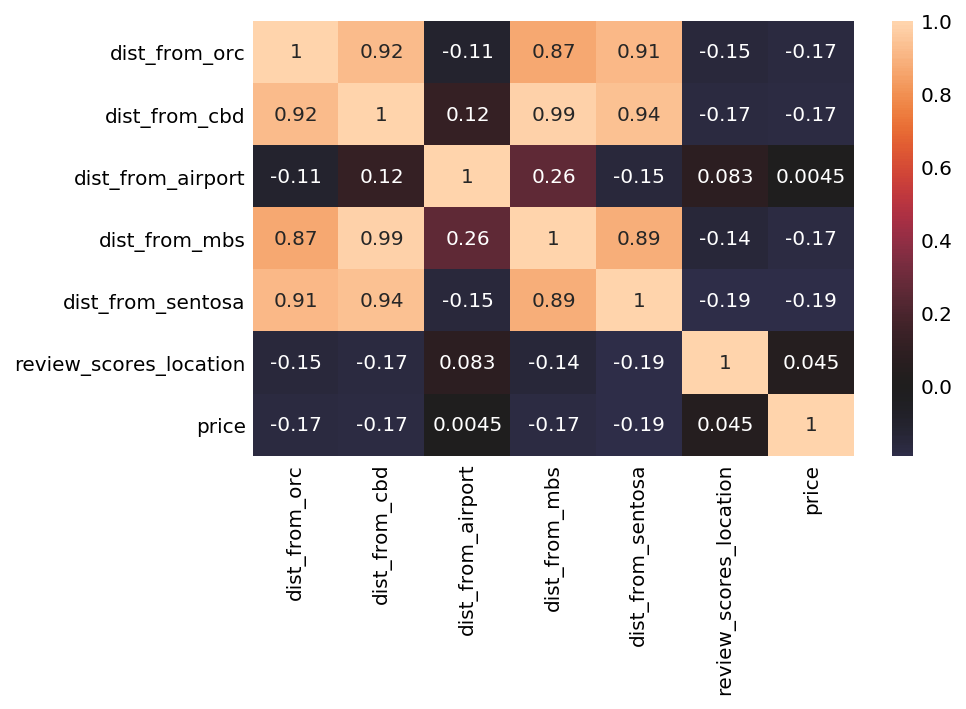

In [91]:
sns.heatmap(active[['dist_from_orc','dist_from_cbd','dist_from_airport','dist_from_mbs','dist_from_sentosa','review_scores_location','price']].corr(),center=0,annot=True)

# Setting up predictor and target variables

In [123]:
# Create separate datasets for room_types
entire = active[active['room_type'] == 'Entire home/apt']
private = active[active['room_type'] == 'Private room']
shared = active[active['room_type'] == 'Shared room']

# Remove outliers
entire = entire[entire['price'] < np.mean(entire['price']) + 2*np.std(entire['price'])]
private = private[private['price'] < np.mean(private['price']) + 2*np.std(private['price'])]
shared = shared[shared['price'] < np.mean(shared['price']) + 2*np.std(shared['price'])]

# Remove listings that are $0 price
entire = entire[entire['price'] > 0]
private = private[private['price'] > 0]
shared = shared[shared['price'] > 0]

# Concatenate all 3 sets back together
active1 = pd.concat([entire,private,shared], axis=0)

In [124]:
# Remove organizations - e.g hotel, serviced apartments, hostels

active1 = active1[(active1['property_type'] != 'Serviced apartment') & \
                  (active1['property_type'] != 'Hostel') & (active1['property_type'] != 'Hotel') & \
                 (active1['property_type'] != 'Boutique hotel')]

In [125]:
condition1 = (active1['minimum_nights'] < np.mean(active1['minimum_nights'])+2*np.std(active1['minimum_nights'])) \
            & (active1['bathrooms'] < np.mean(active1['bathrooms'])+4*np.std(active1['bathrooms']))            

In [208]:
# Set up predictor varibles without features that needs dummifying first

predictor = active1[condition1][['host_since','host_is_superhost','host_listings_count','host_identity_verified',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating',
                    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value',
                    'review_scores_present','instant_bookable','require_guest_profile_picture',
                    'require_guest_phone_verification','reviews_per_month','dist_from_orc','dist_from_cbd',
                                'dist_from_airport','dist_from_sentosa']]

In [209]:
# Dummify variables

predictor_dummy = pd.get_dummies(active1[condition1][['host_response_time','room_type','property_type','cancellation_policy']])

In [210]:
# Descriptive variables

    # Amenities variables 
predictor_amenities = active1[condition1].iloc[:,112:]

    # Listing Name
# predictor_name = active1[condition1]['name']

In [211]:
# Set up target variable

target = active1[condition1]['price']

In [212]:
# Final predictor variables with dummy

predictor = pd.concat([predictor,predictor_dummy],axis=1)

In [213]:
# Set up X and y

X = predictor
y = target

# Split into train and test set

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2889, 47) (2889,)
(510, 47) (510,)


# NLP Techniques - Listing Name

In [215]:
# # Load NLP libraries

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import stop_words
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize, sent_tokenize 
# from textblob import TextBlob, Word
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [216]:
# # Create function to get frequent words for CountVectorizer / TF-IDF Vectorizer

# def get_freq_words(sparse_counts, columns):
#     # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
#     #   which we then convert into a 1-D ndarray for sorting
#     word_counts = np.asarray(sparse_counts.sum(axis=0)).reshape(-1)

#     # argsort() returns smallest first, so we reverse the result
#     largest_count_indices = word_counts.argsort()[::-1]

#     # pretty-print the results! Remember to always ask whether they make sense ...
#     freq_words = pd.Series(word_counts[largest_count_indices], 
#                            index=columns[largest_count_indices])

#     return freq_words

In [217]:
# stopwords = stop_words.ENGLISH_STOP_WORDS

In [218]:
# cvec = CountVectorizer(stop_words=stopwords, ngram_range=(1,4), min_df=80, max_df=0.4)
# cvec.fit(X_train['name'])
# df_train  = pd.DataFrame(cvec.transform(X_train['name']).todense(),
#              columns=cvec.get_feature_names())
# df_test = pd.DataFrame(cvec.transform(X_test['name']).todense(),
#              columns=cvec.get_feature_names())
# columns = np.array(cvec.get_feature_names())

In [219]:
# get_freq_words(cvec.transform(X_train['name']), columns)

In [220]:
# # Concat tokens into main df

# X_train = X_train.drop('name',axis=1)
# X_train.reset_index(drop = True, inplace = True) 
# X_train = pd.concat([X_train,df_train], axis=1)

# X_test = X_test.drop('name',axis=1)
# X_test.reset_index(drop = True, inplace = True) 
# X_test = pd.concat([X_test,df_test], axis=1)

# Standardize using Standardscaler

In [221]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# Linear Regression

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

score_r2 = cross_val_score(lr,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lr,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mae: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mse: ', np.std(score_mse))

Cross_val_scores r2:  [ 7.33467728e-01  7.17918618e-01 -1.07302864e+25  7.28797846e-01
  7.13907105e-01]
Mean r2:  -2.1460572798852375e+24
Standard Deviation r2:  4.292114559770475e+24
   
Cross_val_scores mae:  [-1.76399648e+03 -2.10314699e+03 -7.93986636e+28 -2.08589951e+03
 -2.38632467e+03]
Mean mse:  -1.587973272123716e+28
Standard Deviation mse:  3.175946544247432e+28


# Lasso for Feature Selection

In [223]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from math import sqrt

lassoregcv = LassoCV(normalize=False, random_state=100, max_iter=10000)
lassoregcv.fit(X_train_std, y_train)
print('best alpha: {}'.format(lassoregcv.alpha_))

lassoreg = Lasso(alpha=lassoregcv.alpha_, normalize=False, random_state=100, max_iter=10000)

score_r2 = cross_val_score(lassoreg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lassoreg,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

# Check coefficients of lasso model

lasso_coef = pd.DataFrame(lassoregcv.coef_,index=X_train.columns).sort_values(by=0,ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha: 0.1369981380234839
Cross_val_scores r2:  [0.73448411 0.71684767 0.70848693 0.72893025 0.71452935]
Mean r2:  0.7206556613308409
Standard Deviation r2:  0.009589633962126384
   
Cross_val_scores mse:  [-1757.26975359 -2111.1317615  -2157.04852266 -2084.88113358
 -2381.13449617]
Mean mse:  -2098.293133500006
Standard Deviation mae:  200.04653955850097
Root Mean Squared Error:  45.80712972343941


In [224]:
lassoreg.fit(X_train_std,y_train)
y_lasso_pred = lassoreg.predict(X_test_std)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(r2_score(y_test, y_lasso_pred))
print(mean_squared_error(y_test, y_lasso_pred))
print(sqrt(mean_squared_error(y_test, y_lasso_pred)))

0.7992660735927785
1660.7785410804959
40.75265072459086


In [225]:
# Grid Search Lasso Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
lassogrid = Lasso(max_iter=5000)

# Set up gridsearch parameters
param_grid = {'alpha': np.arange(0.25,0.35,0.005)}

# Conduct gridsearch
lassogrid = GridSearchCV(lassogrid,param_grid,cv=5)
lassogrid.fit(X_train_std,y_train)

# Check best estimator & score
print(lassogrid.best_estimator_)

score_r2 = cross_val_score(lassogrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lassogrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

Lasso(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Cross_val_scores r2:  [0.7348237  0.71555419 0.70774545 0.72876996 0.71456067]
Mean r2:  0.7202907911658946
Standard Deviation r2:  0.009957478380079795
   
Cross_val_scores mse:  [-1755.02224854 -2120.77574773 -2162.5350672  -2086.11402473
 -2380.87326734]
Mean mse:  -2101.064071108917
Standard Deviation mae:  201.21076845153766
Root Mean Squared Error:  45.837365446859145


# Recalibrate features based on Lasso results

In [226]:
# Remove features that have coefficient = 0

X_aft_lasso_train = X_train.drop(lasso_coef[lasso_coef[0] < 0.01].index, axis=1)
X_aft_lasso_test = X_test.drop(lasso_coef[lasso_coef[0] < 0.01].index, axis=1)

print(X_aft_lasso_train.shape, y_train.shape)
print(X_aft_lasso_test.shape, y_test.shape)

# Standardize data using StandardScaler

from sklearn.preprocessing import StandardScaler

ss_aft_lasso = StandardScaler()
X_aft_lasso_train_std = ss.fit_transform(X_aft_lasso_train)
X_aft_lasso_test_std = ss.transform(X_aft_lasso_test)

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeregcv = RidgeCV(normalize=False)
ridgeregcv.fit(X_aft_lasso_train_std, y_train)
print('best alpha: {}'.format(ridgeregcv.alpha_))

# Set up ridge with the best alpha

ridgereg = Ridge(alpha=ridgeregcv.alpha_, normalize=False)

score_r2 = cross_val_score(ridgereg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(ridgereg,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mae: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

(2889, 22) (2889,)
(510, 22) (510,)
best alpha: 10.0
Cross_val_scores r2:  [0.73377916 0.71810057 0.70875288 0.72867527 0.71437444]
Mean r2:  0.7207364625480421
Standard Deviation r2:  0.009210494245416192
   
Cross_val_scores mse:  [-1761.93533174 -2101.79042093 -2155.0805838  -2086.84231032
 -2382.4265973 ]
Mean mae:  -2097.615048819887
Standard Deviation mae:  198.6123178173829
Root Mean Squared Error:  45.79972760639398


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [227]:
# Fit on train data to predict test data

ridgereg.fit(X_train_std,y_train)
y_ridge_pred = ridgereg.predict(X_test_std)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(r2_score(y_test, y_ridge_pred))
print(mean_squared_error(y_test, y_ridge_pred))
print(sqrt(mean_squared_error(y_test, y_ridge_pred)))

0.7981959423793152
1669.6323057991456
40.861134416449396


In [230]:
# Check coefficients of lasso model

ridge_coef = pd.DataFrame(ridgereg.coef_,index=X_train.columns).sort_values(by=0,ascending=False)
ridge_coef

,0
guests_included,36.697312
room_type_Entire home/apt,16.786967
beds,13.168856
host_is_superhost,8.168920
review_scores_rating,7.677302
dist_from_orc,7.547560
review_scores_location,6.799859
require_guest_phone_verification,5.649802
bathrooms,5.519294
dist_from_airport,5.339502


In [229]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
ridgegrid = Ridge(max_iter=5000)

# Set up gridsearch parameters
param_grid = {'alpha': np.arange(8,15,0.5)}

# Conduct gridsearch
ridgegrid = GridSearchCV(ridgegrid,param_grid,cv=5)
ridgegrid.fit(X_train_std,y_train)

# Check best estimator & score
print(ridgegrid.best_estimator_)

score_r2 = cross_val_score(ridgegrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(ridgegrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

Ridge(alpha=14.5, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Cross_val_scores r2:  [0.73389995 0.71814834 0.70884601 0.72875194 0.7145179 ]
Mean r2:  0.7208328269006449
Standard Deviation r2:  0.009211193339480526
   
Cross_val_scores mse:  [-1761.13592524 -2101.43422496 -2154.39146976 -2086.2526107
 -2381.22998702]
Mean mse:  -2096.8888435362105
Standard Deviation mae:  198.50453394546233
Root Mean Squared Error:  45.791798867659814


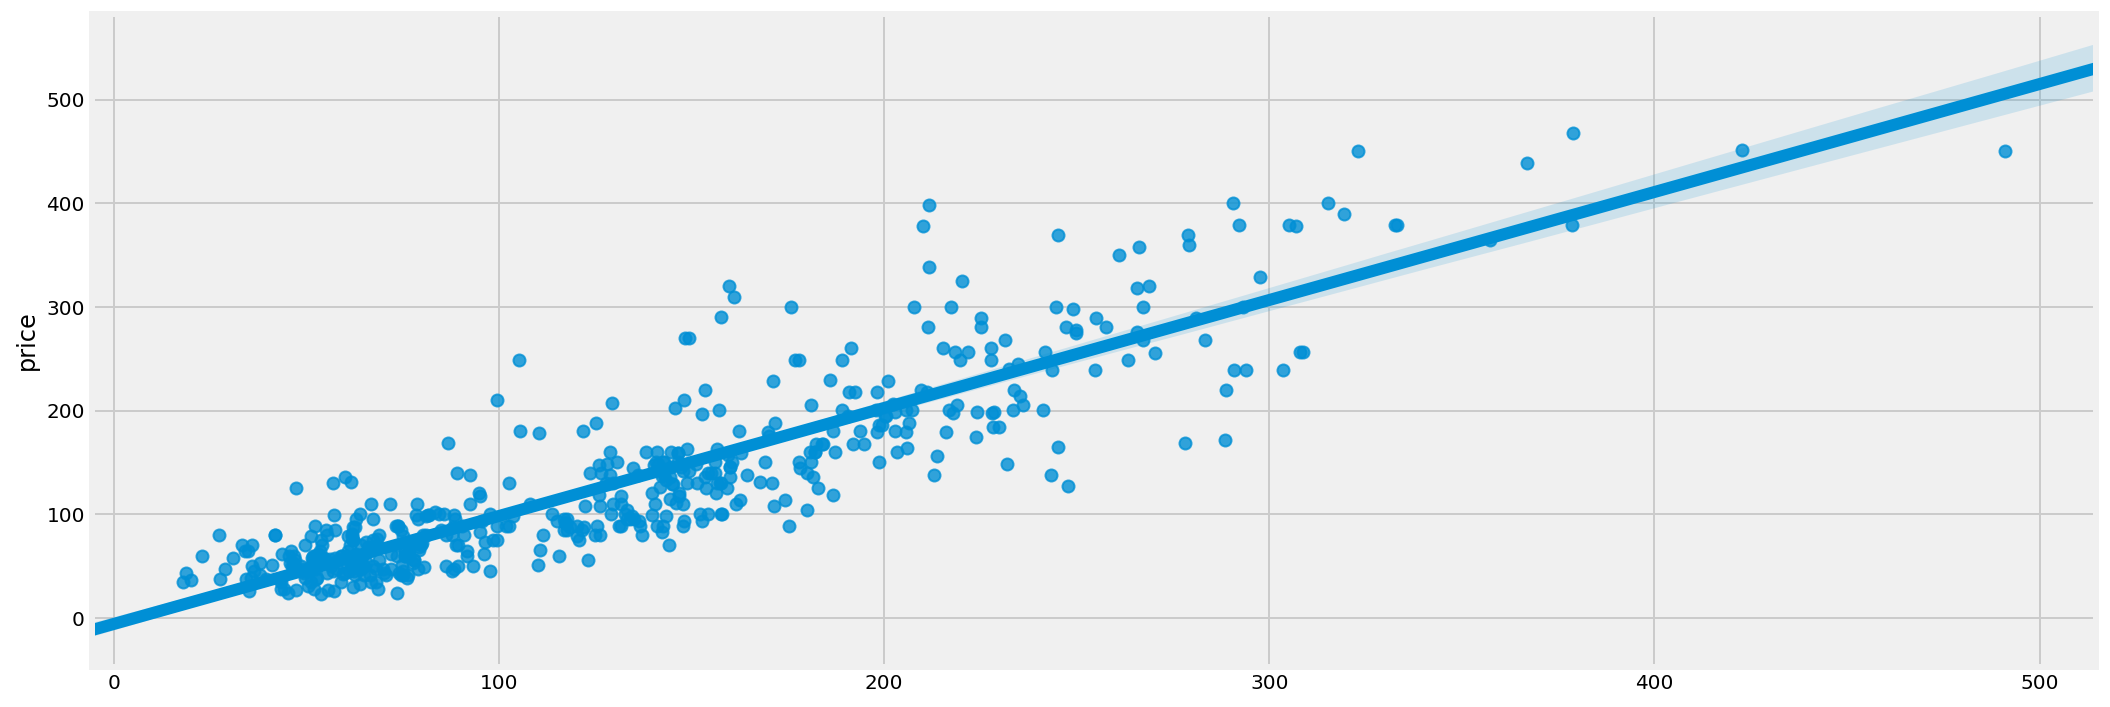

In [150]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=y_ridge_pred,y=y_test)

In [151]:
pred_actual = pd.DataFrame([y_ridge_pred,y_test],columns=y_test.index, index=['Predicted','Actual']).T

pred_actual['Difference'] = pred_actual['Actual'] - pred_actual['Predicted']

pred_actual = pd.concat([pred_actual,active],axis=1,join='inner')

In [231]:
lasso_coef

,0
guests_included,36.766517
room_type_Entire home/apt,30.686226
beds,13.189433
host_is_superhost,8.016085
review_scores_rating,7.063800
review_scores_location,6.596350
bathrooms,5.271528
dist_from_orc,4.302381
require_guest_phone_verification,4.262039
security_dep_required,4.224576


In [306]:
converted = []
converted_abs = []

for i,label in enumerate(lasso_coef.index):
    converted.append((lasso_coef.values[i]/X_train[label].std())[0])
    converted_abs.append(abs((lasso_coef.values[i]/X_train[label].std())[0]))

In [308]:
lasso_coef['Converted Effect'] = converted
lasso_coef['Converted Effect_abs'] = converted_abs
lasso_coef.sort_values(by='Converted Effect_abs', ascending=False)

,0,Converted Effect,Converted Effect_abs
room_type_Entire home/apt,30.686226,61.383636,61.383636
require_guest_profile_picture,-4.585209,-41.905448,41.905448
room_type_Shared room,-5.398601,-36.957047,36.957047
require_guest_phone_verification,4.262039,35.191527,35.191527
property_type_Bed and breakfast,-3.020083,-26.165950,26.165950
cancellation_policy_super_strict,-0.481037,-25.855469,25.855469
guests_included,36.766517,22.527802,22.527802
property_type_Bungalow,2.290703,21.552870,21.552870
host_is_superhost,8.016085,20.126112,20.126112
property_type_Apartment,-6.669943,-13.487105,13.487105


In [232]:
pred_actual.sort_values(by='Difference',ascending=True)[['Predicted','Actual','Difference','listing_url','property_type','room_type','neighbourhood_cleansed','host_since','host_is_superhost','host_listings_count',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating','review_scores_value']]

,Predicted,Actual,Difference,listing_url,property_type,room_type,neighbourhood_cleansed,host_since,host_is_superhost,host_listings_count,bathrooms,beds,security_dep_required,guests_included,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_rev_duration,review_scores_rating,review_scores_value
1023,247.610274,127.0,-120.610274,https://www.airbnb.com/rooms/8815351,Condominium,Entire home/apt,Geylang,4,0,1,1.0,5.0,1,5,1,14,5,1.0,92.0,9.0
7157,288.410262,172.0,-116.410262,https://www.airbnb.com/rooms/32273714,Condominium,Entire home/apt,Museum,4,1,15,2.0,4.0,1,5,15,1,1,0.0,100.0,10.0
779,278.035027,169.0,-109.035027,https://www.airbnb.com/rooms/7440447,Apartment,Entire home/apt,Ang Mo Kio,4,0,1,2.5,5.0,1,6,3,59,0,30.0,94.0,9.0
5558,243.182754,138.0,-105.182754,https://www.airbnb.com/rooms/28559943,Apartment,Entire home/apt,Geylang,4,0,69,2.0,2.0,1,6,3,1,1,2.0,100.0,8.0
4166,175.305581,89.0,-86.305581,https://www.airbnb.com/rooms/23436127,Apartment,Entire home/apt,Geylang,4,0,4,1.0,2.0,1,4,1,25,23,1.0,90.0,9.0
461,231.909196,149.0,-82.909196,https://www.airbnb.com/rooms/5290367,Condominium,Entire home/apt,Novena,5,0,2,2.0,2.0,0,4,2,1,0,39.0,94.0,9.0
2546,245.227892,165.0,-80.227892,https://www.airbnb.com/rooms/17033435,Apartment,Entire home/apt,Marine Parade,5,0,3,1.0,3.0,1,6,2,31,13,2.0,94.0,9.0
4843,179.908507,104.0,-75.908507,https://www.airbnb.com/rooms/25992872,Apartment,Entire home/apt,Novena,4,0,69,1.0,1.0,1,4,14,2,2,2.0,90.0,9.0
3121,212.898092,138.0,-74.898092,https://www.airbnb.com/rooms/19661959,Apartment,Entire home/apt,Jurong West,2,0,1,2.0,4.0,1,4,7,8,1,8.0,90.0,9.0
453,144.183811,70.0,-74.183811,https://www.airbnb.com/rooms/5253599,Apartment,Entire home/apt,Kallang,5,0,6,1.0,1.0,1,2,29,8,0,14.0,94.0,9.0


In [233]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=740)
rfr.fit(X_train_std, y_train)
y_rf_pred = rfr.predict(X_test_std)

print(r2_score(y_test, y_rf_pred))
print(mean_squared_error(y_test, y_rf_pred))
print(sqrt(mean_squared_error(y_test, y_rf_pred)))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8117299153305194
1557.6585490196078
39.4671831908436


In [119]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
rfrgrid = RandomForestRegressor()

# Set up gridsearch parameters
param_grid = {'n_estimators': [200],
            'max_depth': [10,15,20,25],
             'min_samples_split': [2,5,10]}

# Conduct gridsearch
rfrgrid = GridSearchCV(rfrgrid,param_grid,cv=5)
rfrgrid.fit(X_train_std,y_train)

# Check score of model
score_r2 = cross_val_score(rfrgrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(rfrgrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

KeyboardInterrupt: 

In [234]:
# 1st try best estimator
rfrgrid = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=705, verbose=0, warm_start=False)

In [121]:
# Check best estimator from gridsearch

rfrgrid.best_estimator_

AttributeError: 'RandomForestRegressor' object has no attribute 'best_estimator_'

In [235]:
# Run model after gridsearch

rfrgrid = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

rfrgrid.fit(X_train_std, y_train)
y_rf_grid_pred = rfrgrid.predict(X_test_std)

print(r2_score(y_test, y_rf_grid_pred))
print(mean_squared_error(y_test, y_rf_grid_pred))
print(sqrt(mean_squared_error(y_test, y_rf_grid_pred)))

0.8146322765067802
1533.6457712780884
39.16178968430948


# XGBoost Regressor

In [236]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(random_state=0)

score_r2 = cross_val_score(xg_reg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(xg_reg,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Cross_val_scores r2:  [0.81330899 0.80581556 0.77665466 0.8120074  0.80248771]
Mean r2:  0.802054862920256
Standard Deviation r2:  0.01330570382497456
   


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Cross_val_scores mse:  [-1235.58130779 -1447.80355413 -1652.64195214 -1445.90911511
 -1647.46647162]
Mean mse:  -1485.8804801580159
Standard Deviation mae:  154.67169048393225
Root Mean Squared Error:  38.547120257653695


In [237]:
xg_reg.fit(X_train_std,y_train)
y_xgb_pred = xg_reg.predict(X_test_std)

print(r2_score(y_test, y_xgb_pred))
print(mean_squared_error(y_test, y_xgb_pred))
print(sqrt(mean_squared_error(y_test, y_xgb_pred)))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8211960860373276
1479.3398838220821
38.46218771497641


### GridSearch XGBoost Regressor

In [275]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
xg_reggrid = xgb.XGBRegressor(random_state=0)

# Set up gridsearch parameters
param_grid = {'max_depth': [3,10,15],
             'gamma': [0,0.1,0.2]}

# Conduct gridsearch
xg_reggrid = GridSearchCV(xg_reggrid,param_grid,cv=5)
xg_reggrid.fit(X_train_std,y_train)

# Check best estimator & score
print(xg_reggrid.best_estimator_)

score_r2 = cross_val_score(xg_reggrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(xg_reggrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

Cross_val_scores r2:  [0.79856674 0.7812705  0.77653403 0.80242869 0.75574832]
Mean r2:  0.7829096549442355
Standard Deviation r2:  0.016776234216611702
   


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

Cross_val_scores mse:  [-1333.15025471 -1630.80700342 -1653.53455733 -1519.58198787
 -2037.32358124]
Mean mse:  -1634.879476913022
Standard Deviation mae:  230.93717270580402
Root Mean Squared Error:  40.433642884521575


# Ensemble

In [238]:
ensemble = pd.DataFrame([y_lasso_pred,y_ridge_pred,y_rf_grid_pred, y_xgb_pred], index=['Lasso','Ridge','RandomForest','XGBoost']).T
ensemble['Ave'] = (ensemble['Lasso'] + ensemble['Ridge'] + ensemble['RandomForest'] + ensemble['XGBoost'])/4

In [239]:
# Check score of ensemble method

print('R2 score', r2_score(y_test, ensemble['Ave']))
print('MSE', mean_squared_error(y_test, ensemble['Ave']))
print('RMSE', sqrt(mean_squared_error(y_test, ensemble['Ave'])))

R2 score 0.8327050695541098
MSE 1384.119941700562
RMSE 37.20376246699468


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


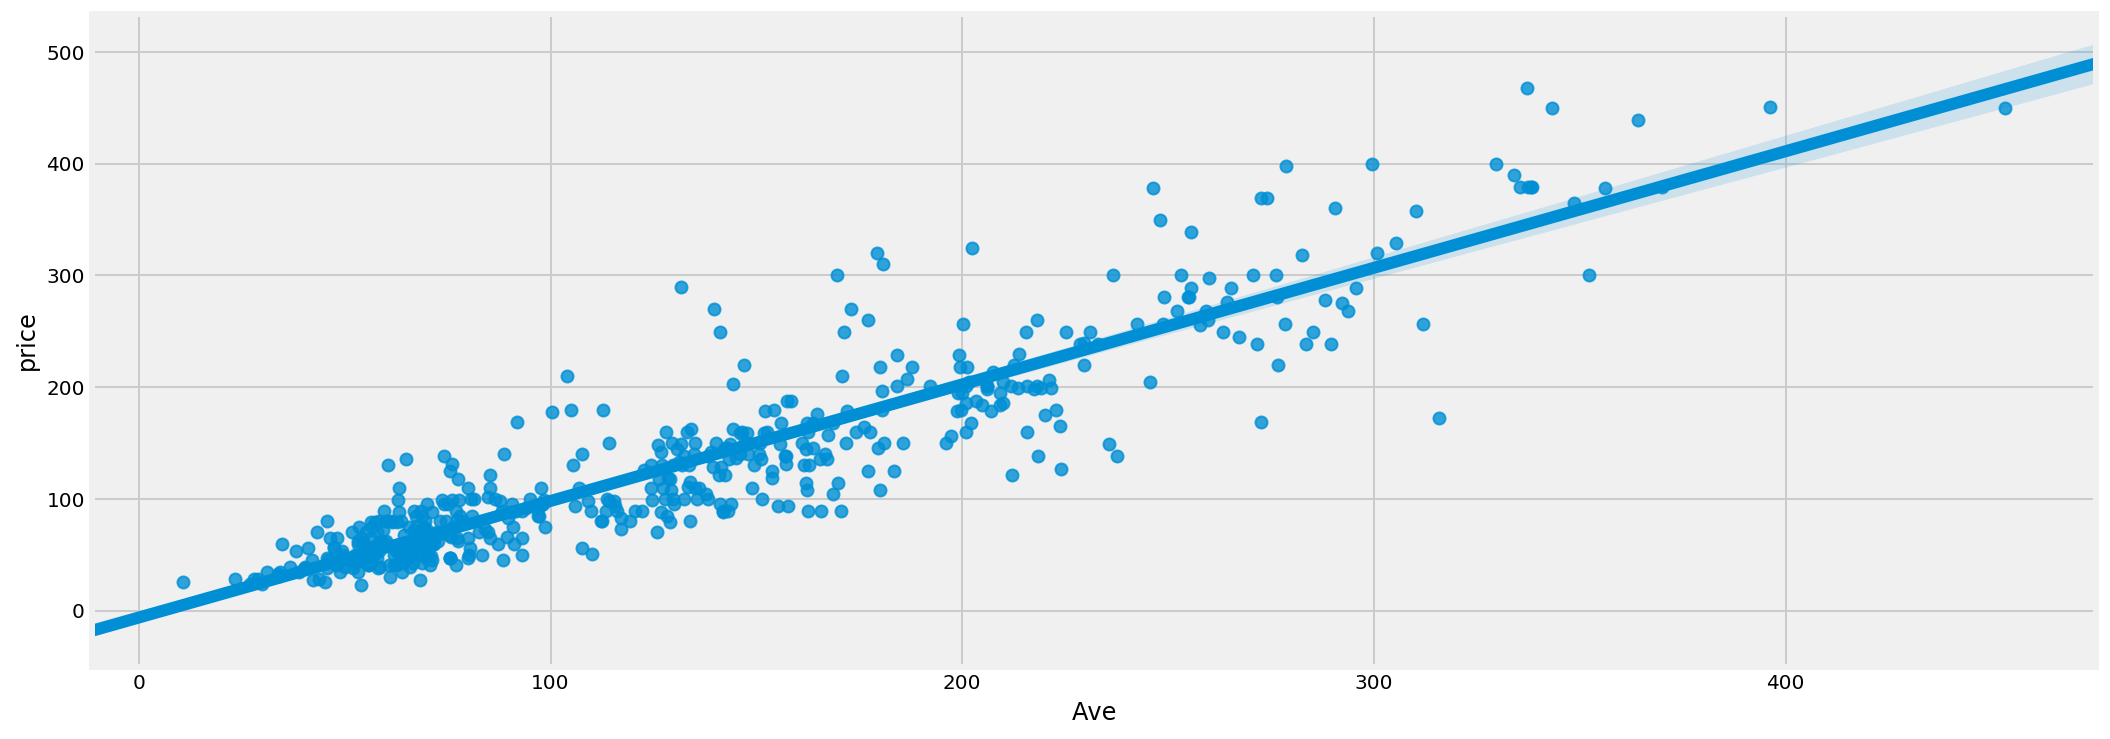

In [192]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=ensemble['Ave'],y=y_test)

In [194]:
!pip install folium

    100% |████████████████████████████████| 92kB 4.8MB/s ta 0:00:01


In [92]:
# Load File with the neighbourhood coordinates & Details

neighbourhood_coord = './Location Map Excel.csv'
neighbourhood_df = pd.read_csv(neighbourhood_coord)

In [93]:
# Check dataframe

neighbourhood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
Location    34 non-null object
Lat         34 non-null float64
Long        34 non-null float64
Value       34 non-null int64
Price       34 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


In [97]:
neighbourhood_df.head()

,Location,Lat,Long,Value,Price
0,Geylang,1.321927,103.871519,1078.0,136.126667
1,Kallang,1.311725,103.871351,1035.0,136.926789
2,Novena,1.320314,103.843373,607.0,171.430712
3,Rochor,1.303815,103.852613,515.0,142.514019
4,Downtown Core,1.286776,103.851561,479.0,231.854962


In [95]:
# Convert Value column into float

neighbourhood_df['Value'] = neighbourhood_df['Value'].map(lambda x: float(x))

In [87]:
# import the library
import folium
import pandas as pd
 
# Make an empty map
m = folium.Map(location=[20.0,0.0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(neighbourhood_df)):
   folium.Circle(
      location=[neighbourhood_df.iloc[i]['Lat'], neighbourhood_df.iloc[i]['Long']],
      popup=neighbourhood_df.iloc[i]['Location'],
      radius=neighbourhood_df.iloc[i]['Value']*2,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
# # Save it as html
# m.save('mymap.html')

In [88]:
m

In [101]:
# import the library
import folium
import pandas as pd
 
# Make an empty map
m2 = folium.Map(location=[20.0,0.0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(neighbourhood_df)):
   folium.Circle(
      location=[neighbourhood_df.iloc[i]['Lat'], neighbourhood_df.iloc[i]['Long']],
      popup=neighbourhood_df.iloc[i]['Location'],
      radius=neighbourhood_df.iloc[i]['Price']*5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m2)
 
# # Save it as html
# m.save('mymap.html')

In [102]:
m2